In [108]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split 

In [109]:
dataset_train = pd.read_csv("/home/nbuser/library/train.csv")
dataset_test = pd.read_csv("/home/nbuser/library/test.csv")


In [110]:
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
Pclass_data = dataset_train.iloc[:, 2]
Name_data = dataset_train.iloc[:, 3]
Sex_data = dataset_train.iloc[:, 4]
SibSp_data = dataset_train.iloc[:, 6]
Parch_data = dataset_train.iloc[:, 7]
Ticket_data = dataset_train.iloc[:, 8]
Embarked_data = dataset_train.iloc[:, -1]

In [112]:
Name_data[0]

'Braund, Mr. Owen Harris'

In [113]:
name_list = [name.split() for name in Name_data[0].split(',')]

In [114]:
name_list = []
passenger = []

In [115]:
for index_name in range(len(Name_data)):
    name_list.append([name.split() for name in Name_data[index_name].split(',')])
    

In [116]:
for index in range(len(name_list)):
    passenger.append(name_list[index][0][0])
    

In [121]:
for pass_index in range(len(name_list)):
    passenger[pass_index] = name_list[pass_index][0][0]

In [122]:
passenger

['Braund',
 'Cumings',
 'Heikkinen',
 'Futrelle',
 'Allen',
 'Moran',
 'McCarthy',
 'Palsson',
 'Johnson',
 'Nasser',
 'Sandstrom',
 'Bonnell',
 'Saundercock',
 'Andersson',
 'Vestrom',
 'Hewlett',
 'Rice',
 'Williams',
 'Vander',
 'Masselmani',
 'Fynney',
 'Beesley',
 'McGowan',
 'Sloper',
 'Palsson',
 'Asplund',
 'Emir',
 'Fortune',
 "O'Dwyer",
 'Todoroff',
 'Uruchurtu',
 'Spencer',
 'Glynn',
 'Wheadon',
 'Meyer',
 'Holverson',
 'Mamee',
 'Cann',
 'Vander',
 'Nicola-Yarred',
 'Ahlin',
 'Turpin',
 'Kraeff',
 'Laroche',
 'Devaney',
 'Rogers',
 'Lennon',
 "O'Driscoll",
 'Samaan',
 'Arnold-Franchi',
 'Panula',
 'Nosworthy',
 'Harper',
 'Faunthorpe',
 'Ostby',
 'Woolner',
 'Rugg',
 'Novel',
 'West',
 'Goodwin',
 'Sirayanian',
 'Icard',
 'Harris',
 'Skoog',
 'Stewart',
 'Moubarek',
 'Nye',
 'Crease',
 'Andersson',
 'Kink',
 'Jenkin',
 'Goodwin',
 'Hood',
 'Chronopoulos',
 'Bing',
 'Moen',
 'Staneff',
 'Moutal',
 'Caldwell',
 'Dowdell',
 'Waelens',
 'Sheerlinck',
 'McDermott',
 'Carrau',
 '

In [170]:
import pandas as pd
new_data = pd.DataFrame(columns=['Pclass','Name','SibSp','Parch','Ticket', 'Embarked'])
new_data['Pclass'] = Pclass_data
new_data['Name'] = passenger
new_data['SibSp'] = SibSp_data
new_data['Parch'] = Parch_data
new_data['Ticket'] = Ticket_data
new_data['Embarked'] = Embarked_data

In [171]:
new_data.head()

,Pclass,Name,SibSp,Parch,Ticket,Embarked
0,3,Braund,1,0,A/5 21171,S
1,1,Cumings,1,0,PC 17599,C
2,3,Heikkinen,0,0,STON/O2. 3101282,S
3,1,Futrelle,1,0,113803,S
4,3,Allen,0,0,373450,S


In [172]:
from sklearn.preprocessing import LabelEncoder

obj_df = new_data.select_dtypes(include=['object']).copy()

lb_make = LabelEncoder()
obj_df["Name_code"] = lb_make.fit_transform(obj_df["Name"])
obj_df[["Name", "Name_code"]]

obj_df["Ticket_code"] = lb_make.fit_transform(obj_df["Ticket"])
obj_df[["Ticket", "Ticket_code"]]



new_data["Name"] = obj_df["Name_code"]
new_data["Ticket"] = obj_df["Ticket_code"]
new_data.head()


,Pclass,Name,SibSp,Parch,Ticket,Embarked
0,3,73,1,0,523,S
1,1,136,1,0,596,C
2,3,251,0,0,669,S
3,1,198,1,0,49,S
4,3,11,0,0,472,S


In [196]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

X = new_data.iloc[:, 1:5]

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

y_kmeans

array([3, 3, 3, 1, 3, 2, 2, 0, 3, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 2, 3, 2, 2, 3, 2, 3, 3,
       1, 0, 3, 2, 2, 3, 2, 0, 3, 1, 2, 2, 0, 2, 0, 3, 2, 1, 3, 2, 0, 2,
       0, 3, 1, 1, 3, 3, 3, 1, 1, 0, 0, 0, 1, 3, 2, 2, 2, 1, 3, 1, 3, 0,
       1, 1, 1, 1, 3, 3, 3, 0, 3, 3, 1, 1, 0, 0, 0, 3, 1, 0, 2, 2, 0, 0,
       2, 2, 1, 3, 1, 0, 3, 2, 3, 1, 3, 0, 2, 2, 0, 2, 0, 0, 2, 1, 3, 3,
       0, 2, 0, 0, 2, 1, 0, 3, 1, 2, 3, 3, 1, 0, 3, 3, 2, 1, 3, 2, 0, 0,
       0, 0, 3, 3, 2, 0, 3, 0, 1, 1, 2, 3, 1, 2, 3, 2, 2, 0, 3, 0, 2, 3,
       3, 3, 1, 3, 0, 0, 1, 1, 1, 2, 0, 2, 3, 0, 2, 1, 3, 2, 3, 0, 0, 0,
       0, 2, 2, 0, 1, 2, 3, 2, 1, 1, 3, 1, 3, 3, 0, 1, 3, 0, 3, 1, 1, 3,
       0, 1, 1, 0, 1, 3, 0, 0, 1, 3, 3, 2, 2, 1, 3, 3, 1, 3, 2, 3, 2, 0,
       3, 0, 1, 2, 2, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1, 2, 1,
       3, 0, 2, 2, 3, 3, 1, 0, 2, 0, 3, 1, 2, 2, 0, 3, 1, 2, 2, 3, 2, 0,
       2, 0, 1, 3, 1, 1, 3, 3, 0, 3, 1, 1, 2, 3, 3,

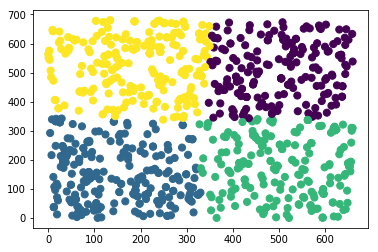

In [208]:
plt.scatter(X.iloc[:, 0], X.iloc[:,3], c=y_kmeans, s=50, cmap='viridis')
plt.show()

#centers = kmeans.cluster_centers_
#plt.scatter(centers[0], centers[1], c='black', s=200, alpha=0.5);